# Word2Vec

The first feed forward neural network based word embedding we'll touch on is <i>Word2Vec</i>. Word2Vec was an approach developed by Mikolov et. al. across two papers in 2013 (<a href="https://arxiv.org/abs/1301.3781">https://arxiv.org/abs/1301.3781</a> and <a href="https://arxiv.org/abs/1310.4546">https://arxiv.org/abs/1310.4546</a>).

The key idea behind this approach is to look at the words that occur next to the word you're interested in across your corpus, an idea known as looking at the <i>context</i> surround the target word.

## The Neural Network

The neural network used for Word2Vec, as previously mentioned, has a very simple architecture and we will introduce it now.

Suppose you wish to represent a vocabulary of $M$ unique words/tokens from your corpus. You then build a network with `M` input nodes, one corresponding to each word in the vocabulary, a single hidden layer with `N` nodes where $N<M$, and an output layer with `M` nodes, again corresponding to each word in the vocabulary.

Its architecture looks like this

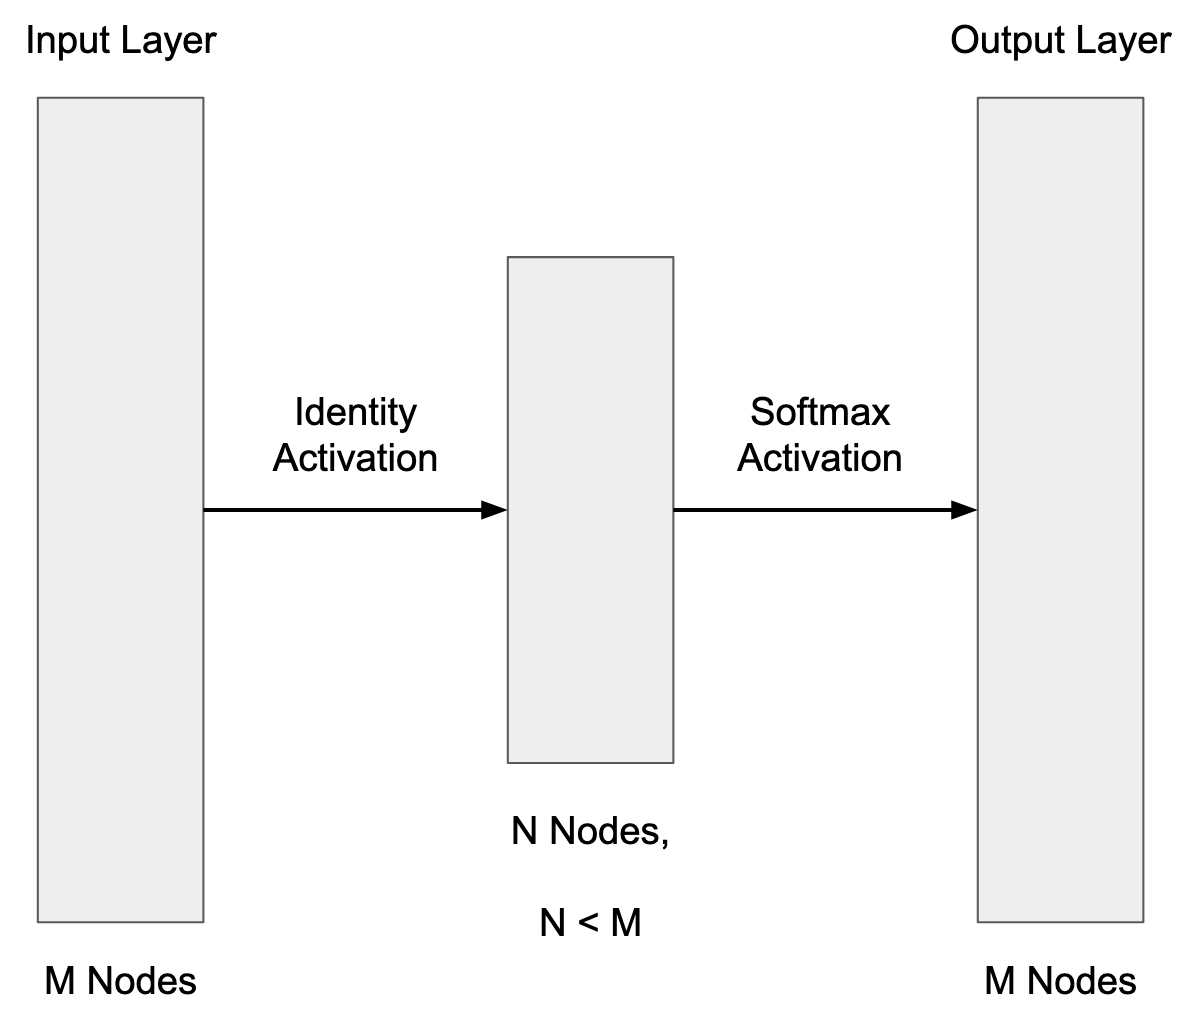

As you can see from the architecture, the activation from the input layer to the hidden layer is the identity function and the activation from the hidden layer to the output layer is the softmax function, which is defined for a vector $z$ with $K$ entries as:
$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}},
$$
and thus transforms the output from nodes of real numbers to a probability distribution.

### Why The Softmax?

The genius of the Word2Vec approach was that it turned the semantics problem, "what does word $w$ mean?" into a context problem, "what is the context of $w$?" is then turned into a multiclass classification problem.

With the above neural net the goal of the network is to model the probability that word $w_j$ is a contextual word (in the skip-gram window) of a given target word $w_t$, i.e. we're modeling the conditional probability:
$$
p(w_j| w_t) \approx \sigma(O)_j = e^{O_j}/\sum_{i=1}^K e^{O_i}
$$
where $O_i$ lazily denotes the output of the weighted sum of the hidden layer nodes at output node $i$.

### What is the Training Data?

The training data for this network is produced from the skipgrams. An $X,y$ pair in the training set would be as follows. $X$ would be a one hot encoded vector where all $M$ entries are $0$ except for the entry corresponding to the target word of interest. $y$ is a one hot encoded vector where all $M$ entries are $0$ except for the entry corresponding to the context word.

### Weights are Where it's at

However, we don't care at all about using the network to make predictions, we just want the weight matrices that result.

Let $W$ be the $N \times M$ trained weight matrix for the input layer into the hidden layer, and let $x_i$ ($M\times 1$) be a one-hot encoded vector corresponding to word $w_i$, then the word2vec embedding of $w_i$ is simply $W x_i$ which is the $i^\text{th}$ column of $W$.


# Pretrained Word2Vec Embeddings

Now that we have a better feel for the model behind Word2Vec we'll see how we can implement word embeddings developed by teams with more computational resources than most everyone has at home.


In [ ]:
import numpy as np
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


The above code takes a bit to run, and takes a long while to run if it's your first time running it (the model is approximately 2GB).

## Google News Embedding

The model we just loaded using `gensim` was built by Google using their Google News dataset. Their network was trained with a vocabulary of 3 million words and phrases.

These 3 million dimensional one hot encoded vectors were then projected down to 300 features, meaning that each word vector in the embedding has 300 dimensions. Using the language from the above image, their $M=3{,}000{,}000$ and their $N=300$.

#### Accessing the Word Vectors

Once the above has loaded you can access the embedding of any word or phrase in the embedding by simply calling `wv[string]`. Let's see

In [ ]:
print(wv['man'])
print(wv['man'].shape)

[ 0.32617188  0.13085938  0.03466797 -0.08300781  0.08984375 -0.04125977
 -0.19824219  0.00689697  0.14355469  0.0019455   0.02880859 -0.25
 -0.08398438 -0.15136719 -0.10205078  0.04077148 -0.09765625  0.05932617
  0.02978516 -0.10058594 -0.13085938  0.001297    0.02612305 -0.27148438
  0.06396484 -0.19140625 -0.078125    0.25976562  0.375      -0.04541016
  0.16210938  0.13671875 -0.06396484 -0.02062988 -0.09667969  0.25390625
  0.24804688 -0.12695312  0.07177734  0.3203125   0.03149414 -0.03857422
  0.21191406 -0.00811768  0.22265625 -0.13476562 -0.07617188  0.01049805
 -0.05175781  0.03808594 -0.13378906  0.125       0.0559082  -0.18261719
  0.08154297 -0.08447266 -0.07763672 -0.04345703  0.08105469 -0.01092529
  0.17480469  0.30664062 -0.04321289 -0.01416016  0.09082031 -0.00927734
 -0.03442383 -0.11523438  0.12451172 -0.0246582   0.08544922  0.14355469
 -0.27734375  0.03662109 -0.11035156  0.13085938 -0.01721191 -0.08056641
 -0.00708008 -0.02954102  0.30078125 -0.09033203  0.03149

In [ ]:
wv['woman']

array([ 2.43164062e-01, -7.71484375e-02, -1.03027344e-01, -1.07421875e-01,
        1.18164062e-01, -1.07421875e-01, -1.14257812e-01,  2.56347656e-02,
        1.11816406e-01,  4.85839844e-02, -9.71679688e-02, -3.43750000e-01,
       -6.29882812e-02, -1.25000000e-01, -2.70996094e-02,  9.42382812e-02,
       -1.87500000e-01, -5.34667969e-02,  6.25000000e-02, -3.05175781e-02,
       -2.90527344e-02, -4.80957031e-02, -5.51757812e-02, -4.08203125e-01,
        1.01318359e-02, -2.32421875e-01, -1.70898438e-01,  2.63671875e-01,
        3.49609375e-01, -2.11914062e-01,  1.43554688e-01, -6.22558594e-03,
       -2.25585938e-01, -1.05468750e-01, -1.16210938e-01,  1.23046875e-01,
        3.06640625e-01, -4.88281250e-02, -9.57031250e-02,  1.99218750e-01,
       -1.57226562e-01, -2.80761719e-02,  1.58203125e-01, -2.42919922e-02,
        1.29882812e-01, -8.98437500e-02, -7.61718750e-02,  3.54003906e-02,
       -3.06396484e-02,  1.52343750e-01,  5.24902344e-02,  1.60980225e-03,
        5.56640625e-02,  

In [ ]:
wv['influenza']

array([ 6.29882812e-02,  1.49536133e-03,  9.61914062e-02,  1.71875000e-01,
        3.44238281e-02, -6.29882812e-02, -3.51562500e-01, -1.48437500e-01,
        2.39257812e-01, -1.12304688e-01,  1.14257812e-01, -4.94140625e-01,
        9.61914062e-02,  8.78906250e-02, -2.28515625e-01,  1.94335938e-01,
        1.31835938e-01,  3.73046875e-01,  2.57812500e-01,  2.43164062e-01,
       -3.43322754e-03, -3.04687500e-01,  2.71484375e-01, -1.41601562e-01,
        3.01513672e-02, -2.83203125e-02,  1.57226562e-01, -3.24218750e-01,
        1.62353516e-02,  5.78613281e-02, -2.03125000e-01, -1.71875000e-01,
        3.82812500e-01, -2.45117188e-01,  8.05664062e-02,  3.51562500e-02,
       -2.65625000e-01,  2.07031250e-01, -1.04370117e-02,  8.16406250e-01,
        1.26953125e-01, -9.81445312e-02, -1.40625000e-01,  1.29882812e-01,
        7.08007812e-02, -2.40234375e-01,  2.43164062e-01,  9.17968750e-02,
       -1.74804688e-01,  4.15039062e-03, -5.49316406e-02, -1.30859375e-01,
       -3.41796875e-01,  

#### Retrieving the index

It would be nice to know whether or not a word/phrase we're interested in is in the vocabulary. We can check by looking at the word index for the vocabulary.

In [ ]:
# index_to_key contains every word in the
# vocabulary
# let's look at the first 20
for i in range(20):
    print(wv.index_to_key[i])

</s>
in
for
that
is
on
##
The
with
said
was
the
at
not
as
it
be
from
by
are


In [ ]:
# wv.index_to_key is a list of the words/phrases in the vocab
print(wv.index_to_key[:20])

['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are']


### Similarity Scores

Similar to LSA Word2Vec can be used to find words that are similar to one another, which is useful for tasks like searching through a document for words related to a particular topic.

Work through the following to learn how to use the pretrained Word2Vec to find both the similarity between pairs of words, as well as find the most similar words to a predefined set.

##### Calculating Similarities between pairs of word embeddings

There are a few different ways you can calculate similarity scores between pairs of vectors. You'll work through them now.

In [ ]:
### similarity(word1, word2)
## call wv.similarity for two words/phrases
## Try and find the similarity between "apple" and
## other fruits and vegetables you know
print("apple and orange",wv.similarity("apple","orange"))
print("apple and tomato",wv.similarity("apple","tomato"))

apple and orange 0.39203462
apple and tomato 0.5608182


In [ ]:
### cosine_similairties(vec1, array_of_vectors)
## call wv.cosine_similarities for a vector and a collection of vectors
## Create a numpy array where each row has the word embeddings
## for the fruits and vegetables you were interested in
## compare to the word embedding for "apple"
embeddings = np.zeros((4,300))

embeddings[0,:] = wv['tomato']
embeddings[1,:] = wv['banana']
embeddings[2,:] = wv['orange']
embeddings[3,:] = wv['pear']

wv.cosine_similarities(wv['apple'], embeddings)

array([0.56081817, 0.5318406 , 0.3920346 , 0.64506968])

##### Finding the most similar words

Another problem you may be interested in is finding the words that are most similar to a given word or vector.

In [ ]:
## You can find the most similar words to a given word
## using wv.similar_by_word(word)
## try it out with "apple"
wv.similar_by_word("apple")

[('apples', 0.720359742641449),
 ('pear', 0.6450697183609009),
 ('fruit', 0.6410146355628967),
 ('berry', 0.6302295327186584),
 ('pears', 0.613396167755127),
 ('strawberry', 0.6058260798454285),
 ('peach', 0.6025872826576233),
 ('potato', 0.5960935354232788),
 ('grape', 0.5935863852500916),
 ('blueberry', 0.5866668224334717)]

In [ ]:
## You can control how many words are returned with topn
## Get the 25 most similar words to "apple"
wv.similar_by_word("apple",topn=25)

[('apples', 0.720359742641449),
 ('pear', 0.6450697183609009),
 ('fruit', 0.6410146355628967),
 ('berry', 0.6302295327186584),
 ('pears', 0.613396167755127),
 ('strawberry', 0.6058260798454285),
 ('peach', 0.6025872826576233),
 ('potato', 0.5960935354232788),
 ('grape', 0.5935863852500916),
 ('blueberry', 0.5866668224334717),
 ('cherries', 0.5784382820129395),
 ('mango', 0.5751855969429016),
 ('apricot', 0.5727777481079102),
 ('melon', 0.5719985365867615),
 ('almond', 0.5704829692840576),
 ('Granny_Smiths', 0.5695334076881409),
 ('grapes', 0.5692256093025208),
 ('peaches', 0.5659247040748596),
 ('pumpkin', 0.5651883482933044),
 ('apricots', 0.5645568370819092),
 ('berries', 0.5636081099510193),
 ('tomato', 0.5608181953430176),
 ('honeycrisp', 0.5566703677177429),
 ('mango_tango', 0.5529055595397949),
 ('apple_pear', 0.5523689985275269)]

In [ ]:
## You can also do this for a collection of words
## with wv.most_similar(list_of_words)
## try running this on the list ["apple","pie"]
## and the list ["apple","computer"]
wv.most_similar(["apple","computer"])

[('computers', 0.5846256017684937),
 ('laptop', 0.5782973170280457),
 ('Apple_IIe', 0.5261160731315613),
 ('apples', 0.5179873108863831),
 ('iMac', 0.513472855091095),
 ('receive_MacMall_Exclusive', 0.5100300908088684),
 ('laptop_computer', 0.5042001008987427),
 ('cartoonish_apple', 0.4981754422187805),
 ('iBook_laptop', 0.49246513843536377),
 ('Macbook_laptop', 0.4881983995437622)]

In [ ]:
## Sometimes you may not have a word, but rather a vector
## You can find the words most similar to that vector with
## wv.similar_by_vector(vec)
## Find the words most similar to the test vector below
test = 2*np.random.random(300)-1

## Code here
wv.similar_by_vector(test)

[('equiv_alent', 0.24898049235343933),
 ('Bud_Light_Diet_Pepsi', 0.24794428050518036),
 ('Publicis_Groupe_Publishers_Clearing', 0.24271437525749207),
 ('Sagging', 0.23950839042663574),
 ('Hult_Center', 0.2326977252960205),
 ('Rhatigan_Student', 0.22986970841884613),
 ('Confetti_flooded', 0.2275429517030716),
 ('Doubling', 0.22611412405967712),
 ('Attracting', 0.22558817267417908),
 ('receieve', 0.22448919713497162)]

##### One of these things just doesn't belong

Another fun feature is that you can put in a list of words and Word2Vec can pick out the one that doesn't belong.

In [ ]:
print(wv.doesnt_match(["apple","banana","grapes","pear","jeans"]))

jeans


In [ ]:
print(wv.doesnt_match(["tried","failed","intolerance","attachment"]))

attachment


#### Debunking Some Common Examples

If you've ever heard of Word2Vec prior to this, you may have seen amazingly intuitive results like "King" - "Man" + "Woman" = "Queen".

Use what you've learned above to test out the following "equations":
- king - man + woman = queen
- bigger - big + cold = colder
- Einstein - scientist + Picasso = painter
- Paris - France + Italy = Rome
- lebron - cavs + lakers = kobe

In [ ]:
vector = wv['king'] - wv['man'] + wv['woman']
wv.similar_by_vector(vector)

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [ ]:
vector = wv['bigger'] - wv['big'] + wv['cold']
wv.similar_by_vector(vector)

[('cold', 0.7878133654594421),
 ('colder', 0.7053806185722351),
 ('warmer', 0.6308302283287048),
 ('colder_temperatures', 0.5584955215454102),
 ('cooler', 0.5487411022186279),
 ('chillier', 0.5474385619163513),
 ('chilly', 0.5405797958374023),
 ('Cold', 0.5328137874603271),
 ('frigid', 0.5286216735839844),
 ('snowier_winter', 0.5251795649528503)]

In [ ]:
vector = wv['Einstein'] - wv['scientist'] + wv['Picasso']
wv.similar_by_vector(vector)

[('Picasso', 0.7582451701164246),
 ('Pablo_Picasso', 0.596178412437439),
 ('Matisse', 0.5724692344665527),
 ('Degas', 0.5545716285705566),
 ('Einstein', 0.5543243288993835),
 ('Rembrandt', 0.5465439558029175),
 ('Dalí', 0.5437686443328857),
 ('Magritte', 0.5413256883621216),
 ('Kandinsky', 0.5227084755897522),
 ('Paul_Cezanne', 0.5170355439186096)]

In [ ]:
vector = wv['Paris'] - wv['France'] + wv['Italy']
wv.similar_by_vector(vector)

[('Milan', 0.7251641750335693),
 ('Rome', 0.7073156237602234),
 ('Italy', 0.6847635507583618),
 ('Paris', 0.6693719625473022),
 ('Palermo_Sicily', 0.6014109253883362),
 ('Italian', 0.596384584903717),
 ('Tuscany', 0.5672276020050049),
 ('Sicily', 0.5654013752937317),
 ('Bologna', 0.5645887851715088),
 ('Bologna_Italy', 0.5513801574707031)]

In [ ]:
vector = wv['lebron'] - wv['cavs'] + wv['lakers']
wv.similar_by_vector(vector)

[('lakers', 0.8796191811561584),
 ('lebron', 0.7018214464187622),
 ('laker', 0.612667441368103),
 ('celtics', 0.6117448210716248),
 ('shaq', 0.5856783986091614),
 ('kobe', 0.5744044780731201),
 ('gasol', 0.5545269846916199),
 ('bynum', 0.543467104434967),
 ('nba', 0.5254707336425781),
 ('mavs', 0.517430305480957)]

## Other Pretrained Models

While we've looked at the Google News embedding there are a number of other pretrained Word2Vec embeddings that may be of interest.

This Github repository has a nice list of the pretrained models you can get online, <a href="https://github.com/3Top/word2vec-api#where-to-get-a-pretrained-models">https://github.com/3Top/word2vec-api#where-to-get-a-pretrained-models</a>.

Here are the names from the `gensim` documentation.

In [ ]:
# ['fasttext-wiki-news-subwords-300',
#  'conceptnet-numberbatch-17-06-300',
#  'word2vec-ruscorpora-300',
#  'word2vec-google-news-300',
#  'glove-wiki-gigaword-50',
#  'glove-wiki-gigaword-100',
#  'glove-wiki-gigaword-200',
#  'glove-wiki-gigaword-300',
#  'glove-twitter-25',
#  'glove-twitter-50',
#  'glove-twitter-100',
#  'glove-twitter-200',
#  '__testing_word2vec-matrix-synopsis']

## Building Your Own Model

`gensim` also offers the functionality to build your own Word2Vec model if you clean the data up. Let's demonstrate the process with a truly controversial example using <u>Green Eggs and Ham</u> by Dr. Seuss.

In [ ]:
## Here is the text of Green Eggs and Ham
seuss = '''
"I AM SAM. I AM SAM. SAM I AM.

THAT SAM-I-AM! THAT SAM-I-AM! I DO NOT LIKE THAT SAM-I-AM!

DO WOULD YOU LIKE GREEN EGGS AND HAM?

I DO NOT LIKE THEM,SAM-I-AM.
I DO NOT LIKE GREEN EGGS AND HAM.

WOULD YOU LIKE THEM HERE OR THERE?

I WOULD NOT LIKE THEM HERE OR THERE.
I WOULD NOT LIKE THEM ANYWHERE.
I DO NOT LIKE GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

WOULD YOU LIKE THEM IN A HOUSE?
WOULD YOU LIKE THEN WITH A MOUSE?

I DO NOT LIKE THEM IN A HOUSE.
I DO NOT LIKE THEM WITH A MOUSE.
I DO NOT LIKE THEM HERE OR THERE.
I DO NOT LIKE THEM ANYWHERE.
I DO NOT LIKE GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

WOULD YOU EAT THEM IN A BOX?
WOULD YOU EAT THEM WITH A FOX?

NOT IN A BOX. NOT WITH A FOX.
NOT IN A HOUSE. NOT WITH A MOUSE.
I WOULD NOT EAT THEM HERE OR THERE.
I WOULD NOT EAT THEM ANYWHERE.
I WOULD NOT EAT GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

WOULD YOU? COULD YOU? IN A CAR?
EAT THEM! EAT THEM! HERE THEY ARE.

I WOULD NOT, COULD NOT, IN A CAR.

YOU MAY LIKE THEM. YOU WILL SEE.
YOU MAY LIKE THEM IN A TREE!

I WOULD NOT, COULD NOT IN A TREE.
NOT IN A CAR! YOU LET ME BE.
I DO NOT LIKE THEM IN A BOX.
I DO NOT LIKE THEM WITH A FOX.
I DO NOT LIKE THEM IN A HOUSE.
I DO NOT LIKE THEM WITH A MOUSE.
I DO NOT LIKE THEM HERE OR THERE.
I DO NOT LIKE THEM ANYWHERE.
I DO NOT LIKE GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

A TRAIN! A TRAIN! A TRAIN! A TRAIN!
COULD YOU, WOULD YOU ON A TRAIN?

NOT ON TRAIN! NOT IN A TREE!
NOT IN A CAR! SAM! LET ME BE!
I WOULD NOT, COULD NOT, IN A BOX.
I WOULD NOT, COULD NOT, WITH A FOX.
I WILL NOT EAT THEM IN A HOUSE.
I WILL NOT EAT THEM HERE OR THERE.
I WILL NOT EAT THEM ANYWHERE.
I DO NOT EAT GREEM EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

SAY! IN THE DARK? HERE IN THE DARK!
WOULD YOU, COULD YOU, IN THE DARK?

I WOULD NOT, COULD NOT, IN THE DARK.

WOULD YOU COULD YOU IN THE RAIN?

I WOULD NOT, COULD NOT IN THE RAIN.
NOT IN THE DARK. NOT ON A TRAIN.
NOT IN A CAR. NOT IN A TREE.
I DO NOT LIKE THEM, SAM, YOU SEE.
NOT IN A HOUSE. NOT IN A BOX.
NOT WITH A MOUSE. NOT WITH A FOX.
I WILL NOT EAT THEM HERE OR THERE.
I DO NOT LIKE THEM ANYWHERE!

YOU DO NOT LIKE GREEN EGGS AND HAM?

I DO NOT LIKE THEM, SAM-I-AM.

COULD YOU, WOULD YOU, WITH A GOAT?

I WOULD NOT, COULD NOT WITH A GOAT!

WOULD YOU, COULD YOU, ON A BOAT?

I COULD NOT, WOULD NOT, ON A BOAT.
I WILL NOT, WILL NOT, WITH A GOAT.
I WILL NOT EAT THEM IN THE RAIN.
NOT IN THE DARK! NOT IN A TREE!
NOT IN A CAR! YOU LET ME BE!
I DO NOT LIKE THEM IN A BOX.
I DO NOT LIKE THEM WITH A FOX.
I WILL NOT EAT THEM IN A HOUSE.
I DO NOT LIKE THEM WITH A MOUSE.
I DO NOT LIKE THEM HERE OR THERE.
I DO NOT LIKE THEM ANYWHERE!
I DO NOT LIKE GREEN EGGS AND HAM!
I DO NOT LIKE THEM, SAM-I-AM.

YOU DO NOT LIKE THEM. SO YOU SAY.
TRY THEM! TRY THEM! AND YOU MAY.
TRY THEM AND YOU MAY, I SAY.

sAM! IF YOU LET ME BE,
I WILL TRY THEM. YOU WILL SEE.

(... and he tries them ...)

SAY! I LIKE GREEN EGGS AND HAM!
I DO! I LIKE THEM, SAM-I-AM!
AND I WOULD EAT THEM IN A BOAT.
AND I WOULD EAT THEM WITH A GOAT...
AND I WILL EAT THEM, IN THE RAIN.
AND IN THE DARK. AND ON A TRAIN.
AND IN A CAR. AND IN A TREE.
THEY ARE SO GOOD, SO GOOD, YOU SEE!
SO I WILL EAT THEM IN A BOX.
AND I WILL EAT THEM WITH A FOX.
AND I WILL EAT THEM IN A HOUSE.
AND I WILL EAT THEM WITH A MOUSE.
AND I WILL EAT THEM HERE AND THERE.
SAY! I WILL EAT THEM ANYWHERE!
I DO SO LIKE GREEN EGGS AND HAM!
THANK YOU! THANK YOU, SAM I AM.
'''

In [ ]:
# Here I clean it up a bit
seuss = seuss.replace("\n","").replace(","," ").replace('"',"").replace("(","").replace(")","")
seuss = seuss.replace(".",". ").replace("!","! ").replace("?","? ")

In [ ]:
# The clean version
print(seuss)

I AM SAM.  I AM SAM.  SAM I AM. THAT SAM-I-AM!  THAT SAM-I-AM!  I DO NOT LIKE THAT SAM-I-AM! DO WOULD YOU LIKE GREEN EGGS AND HAM? I DO NOT LIKE THEM SAM-I-AM. I DO NOT LIKE GREEN EGGS AND HAM. WOULD YOU LIKE THEM HERE OR THERE? I WOULD NOT LIKE THEM HERE OR THERE. I WOULD NOT LIKE THEM ANYWHERE. I DO NOT LIKE GREEN EGGS AND HAM. I DO NOT LIKE THEM  SAM-I-AM. WOULD YOU LIKE THEM IN A HOUSE? WOULD YOU LIKE THEN WITH A MOUSE? I DO NOT LIKE THEM IN A HOUSE. I DO NOT LIKE THEM WITH A MOUSE. I DO NOT LIKE THEM HERE OR THERE. I DO NOT LIKE THEM ANYWHERE. I DO NOT LIKE GREEN EGGS AND HAM. I DO NOT LIKE THEM  SAM-I-AM. WOULD YOU EAT THEM IN A BOX? WOULD YOU EAT THEM WITH A FOX? NOT IN A BOX.  NOT WITH A FOX. NOT IN A HOUSE.  NOT WITH A MOUSE. I WOULD NOT EAT THEM HERE OR THERE. I WOULD NOT EAT THEM ANYWHERE. I WOULD NOT EAT GREEN EGGS AND HAM. I DO NOT LIKE THEM  SAM-I-AM. WOULD YOU?  COULD YOU?  IN A CAR? EAT THEM!  EAT THEM!  HERE THEY ARE. I WOULD NOT  COULD NOT  IN A CAR. YOU MAY LIKE THEM

In [ ]:
# gensim only requires sequences of words in a sentence
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# let's give them just that
sentences = [word_tokenize(sent) for sent in sent_tokenize(seuss)]
sentences

[['I', 'AM', 'SAM', '.'],
 ['I', 'AM', 'SAM', '.'],
 ['SAM', 'I', 'AM', '.'],
 ['THAT', 'SAM-I-AM', '!'],
 ['THAT', 'SAM-I-AM', '!'],
 ['I', 'DO', 'NOT', 'LIKE', 'THAT', 'SAM-I-AM', '!'],
 ['DO', 'WOULD', 'YOU', 'LIKE', 'GREEN', 'EGGS', 'AND', 'HAM', '?'],
 ['I', 'DO', 'NOT', 'LIKE', 'THEM', 'SAM-I-AM', '.'],
 ['I', 'DO', 'NOT', 'LIKE', 'GREEN', 'EGGS', 'AND', 'HAM', '.'],
 ['WOULD', 'YOU', 'LIKE', 'THEM', 'HERE', 'OR', 'THERE', '?'],
 ['I', 'WOULD', 'NOT', 'LIKE', 'THEM', 'HERE', 'OR', 'THERE', '.'],
 ['I', 'WOULD', 'NOT', 'LIKE', 'THEM', 'ANYWHERE', '.'],
 ['I', 'DO', 'NOT', 'LIKE', 'GREEN', 'EGGS', 'AND', 'HAM', '.'],
 ['I', 'DO', 'NOT', 'LIKE', 'THEM', 'SAM-I-AM', '.'],
 ['WOULD', 'YOU', 'LIKE', 'THEM', 'IN', 'A', 'HOUSE', '?'],
 ['WOULD', 'YOU', 'LIKE', 'THEN', 'WITH', 'A', 'MOUSE', '?'],
 ['I', 'DO', 'NOT', 'LIKE', 'THEM', 'IN', 'A', 'HOUSE', '.'],
 ['I', 'DO', 'NOT', 'LIKE', 'THEM', 'WITH', 'A', 'MOUSE', '.'],
 ['I', 'DO', 'NOT', 'LIKE', 'THEM', 'HERE', 'OR', 'THERE', '.'],
 ['I

In [ ]:
# You train a Word2Vec model in gensim with
# Word2Vec
from gensim.models import Word2Vec

In [ ]:
# This line makes a model
# You first put in your sentences
# then you can OPTIONALLY specify a number of parameters
# vector_size is the size of the hidden layer
# window is the size of the skip-gram window
# min_count sets a minimum number of times that a word has to appear
model = Word2Vec(sentences = sentences,
                     vector_size=100,
                     window=3,
                     min_count=2)

In [ ]:
model.wv['SAM']
print(model.wv['SAM'].shape)

(100,)


In [ ]:
model.wv['EGGS']

array([ 9.66820866e-03, -9.51550342e-03, -6.62896410e-03,  2.96509033e-03,
        6.43687462e-03, -5.60858101e-03,  2.95896013e-03,  9.72187240e-03,
       -7.03340909e-03, -6.55443454e-03, -4.90631023e-03, -4.05761972e-03,
        1.97755662e-03,  9.84986499e-03,  6.57898141e-03,  3.41830048e-04,
        2.82351975e-03,  8.35188944e-03,  9.15718824e-03,  5.01972903e-03,
        6.20526634e-03, -7.66821904e-03, -3.42849316e-03, -5.85790491e-03,
        6.23729732e-03, -2.13810219e-03, -9.11655091e-03,  7.76561489e-03,
        8.39573145e-03, -3.21537280e-03,  9.46993567e-03, -9.05394845e-04,
       -3.36125935e-03, -9.54481133e-04,  2.99629392e-05, -3.17113311e-03,
        2.94886925e-03,  5.94066456e-03,  6.49182033e-03, -8.99478234e-03,
       -2.08080932e-03, -5.52126905e-03,  7.30616366e-03,  6.61726389e-03,
       -4.29060776e-03,  1.95723958e-03, -6.01113634e-03, -6.53669194e-05,
        9.57989786e-03, -2.35364283e-03, -4.96810814e-03, -7.62684364e-03,
       -3.23348516e-03, -

In [ ]:
model.wv.most_similar(['HAM'])

[('!', 0.33568042516708374),
 ('MOUSE', 0.19795329868793488),
 ('WITH', 0.17663703858852386),
 ('SAM', 0.13775292038917542),
 ('SAY', 0.13598553836345673),
 ('TRAIN', 0.13524989783763885),
 ('THANK', 0.1329641342163086),
 ('IN', 0.13056810200214386),
 ('OR', 0.12631136178970337),
 ('AND', 0.12346762418746948)]

In [ ]:
## Sometimes you may not have a word, but rather a vector
## You can find the words most similar to that vector with
## wv.similar_by_vector(vec)
## Find the words most similar to the test vector below
test = 2*np.random.random(100)-1

## Code here
model.wv.similar_by_vector(test)

[('SO', 0.25440338253974915),
 ('FOX', 0.2351154237985611),
 ('RAIN', 0.20626863837242126),
 ('.', 0.20462393760681152),
 ('?', 0.20320138335227966),
 ('DO', 0.16041526198387146),
 ('BOAT', 0.15585440397262573),
 ('I', 0.15348254144191742),
 ('THE', 0.15234452486038208),
 ('TREE', 0.1435953825712204)]

In [ ]:
vector = model.wv["SAM"] + model.wv["I"] + model.wv["AM"]
model.wv.similar_by_vector(test)

[('SO', 0.25440338253974915),
 ('FOX', 0.2351154237985611),
 ('RAIN', 0.20626863837242126),
 ('.', 0.20462393760681152),
 ('?', 0.20320138335227966),
 ('DO', 0.16041526198387146),
 ('BOAT', 0.15585440397262573),
 ('I', 0.15348254144191742),
 ('THE', 0.15234452486038208),
 ('TREE', 0.1435953825712204)]

In [ ]:
model.wv.most_similar(["HAM","SAM"])

[('!', 0.2225675880908966),
 ('MOUSE', 0.19200187921524048),
 ('IN', 0.17259852588176727),
 ('SO', 0.162476047873497),
 ('MAY', 0.14890392124652863),
 ('SAY', 0.13193491101264954),
 ('.', 0.1280413269996643),
 ('WITH', 0.12743882834911346),
 ('EGGS', 0.1254088580608368),
 ('RAIN', 0.11768003553152084)]

Since we spent so much time and energy training this model we may want to save it.

In [ ]:
model.save("green_eggs_and_ham.model")

We can load it later.

In [ ]:
model = Word2Vec.load("green_eggs_and_ham.model")

# Gensim comes with several already pre-trained models, in the Gensim-data repository

In [ ]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Download the "glove-twitter-25" embeddings
# Pre-trained glove vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased.
glove_vectors = gensim.downloader.load('glove-twitter-25')
glove_vectors

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
# Use the downloaded vectors as usual:
glove_vectors.most_similar('twitter')

[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

In [ ]:
glove_vectors['queen']

array([-1.1266  , -0.52064 ,  0.45565 ,  0.21079 , -0.05081 , -0.65158 ,
        1.1395  ,  0.69897 , -0.20612 , -0.71803 , -0.02811 ,  0.10977 ,
       -3.3089  , -0.49299 , -0.51375 ,  0.10363 , -0.11764 , -0.084972,
        0.02558 ,  0.6859  , -0.29196 ,  0.4594  , -0.39955 , -0.40371 ,
        0.31828 ], dtype=float32)

### Fasttext: An Improvement on Word2Vec

A nice improvement on Word2Vec was made by Facebook researchers (including Mikolov) called, `fasttext`, <a href="https://arxiv.org/abs/1607.04606">https://arxiv.org/abs/1607.04606</a>.

The key idea to the improvement was to replace words and phrases as the base unit input layer with partial character $n$-grams of words. For example instead of "apples" they used things like "app", "ppl", "ple", and "les".

This is also implementable with `gensim`. Here is the documentation, <a href="https://radimrehurek.com/gensim_3.8.3/models/fasttext.html">https://radimrehurek.com/gensim_3.8.3/models/fasttext.html</a>.


In [ ]:
ft = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
## Let's look at the top 20 words
for i in range(20):
    print(ft.index_to_key[i])


,
the
.
and
of
to
in
a
"
:
)
that
(
is
for
on
*
with
as
it


In [ ]:
## get embedding
print(ft['apple'])

print(ft['apple'].shape)

[-1.3173e-01  8.2252e-03 -4.9115e-02  1.9050e-01 -8.0140e-02 -4.3704e-02
  5.4014e-02 -1.5770e-01  1.7366e-02 -6.3682e-02 -3.5309e-02 -1.0383e-02
  3.7077e-02  8.6940e-03  1.2524e-02  8.0532e-03  3.6221e-02 -7.8963e-02
  5.9926e-02  7.5806e-02 -1.3051e-02  8.9511e-02 -7.6000e-02  2.2368e-02
 -2.7079e-03 -1.1801e-01 -2.1707e-04  9.1305e-02  1.9335e-02  6.4755e-02
  1.6767e-03 -8.7875e-03  4.7681e-02  4.6194e-02  6.0765e-03 -8.1089e-02
 -2.2951e-02 -8.4255e-02 -1.1056e-01  3.6631e-02 -9.0706e-02 -5.8909e-02
 -1.5277e-01 -1.0573e-01  6.0893e-02  5.5942e-02 -5.0123e-02 -1.0179e-03
  5.0950e-02 -4.3039e-02  5.1274e-02  2.0234e-02 -5.0783e-02 -1.2145e-01
 -3.3338e-03 -2.3314e-02  9.1701e-02  4.1844e-03 -7.1584e-02 -1.1494e-01
 -5.3832e-02 -4.1383e-02  1.9317e-01  1.1936e-01 -7.1862e-02 -7.1719e-02
 -5.3918e-02  9.0106e-02 -1.4384e-02 -4.9884e-02 -3.2693e-02 -5.4307e-02
  1.0744e-01  5.2375e-02 -1.2564e-01 -1.4970e-02 -4.1296e-02  2.4587e-02
  2.6073e-02 -1.0724e-01 -7.4320e-02 -8.3024e-02 -1

In [ ]:
## And just to note we can use this model in exactly
## the same way as Word2Vec
ft.similar_by_word("apple",topn=20)

[('apples', 0.8046640753746033),
 ('pear', 0.6897592544555664),
 ('peach', 0.6626990437507629),
 ('fruit', 0.6596963405609131),
 ('apple-', 0.6546189785003662),
 ('appley', 0.6466962099075317),
 ('pippin', 0.6454442143440247),
 ('pome', 0.6110042333602905),
 ('apple-tree', 0.6037725210189819),
 ('berry', 0.602673351764679),
 ('applesauce', 0.6012105345726013),
 ('applejack', 0.6003251075744629),
 ('starfruit', 0.5956475734710693),
 ('cherry', 0.594257116317749),
 ('strawberry', 0.5939095616340637),
 ('banana', 0.5924690961837769),
 ('pears', 0.5920964479446411),
 ('currant', 0.59149169921875),
 ('crabapple', 0.5898768305778503),
 ('watermelon', 0.5855808258056641)]

In [ ]:
ft.similar_by_word("ppl",topn=20)

[('ppls', 0.7948858737945557),
 ('ppl.', 0.7874938249588013),
 ('poeple', 0.761584997177124),
 ('pplz', 0.7385753989219666),
 ('peolpe', 0.6922174096107483),
 ('people.I', 0.687359631061554),
 ('pple', 0.6842299103736877),
 ('peole', 0.6832447052001953),
 ('peopl', 0.6651833057403564),
 ('peple', 0.6493471264839172),
 ('people.', 0.6474063396453857),
 ('peope', 0.6439474821090698),
 ('americans', 0.6331156492233276),
 ('guys.', 0.624374270439148),
 ('peopel', 0.6218089461326599),
 ('evryone', 0.621412456035614),
 ('peolple', 0.6154645085334778),
 ('brits', 0.6141127347946167),
 ('guyz', 0.6072280406951904),
 ('coz', 0.5926057696342468)]

In [ ]:
test = ft['king'] - ft['man'] + ft['woman']
ft.similar_by_vector(test,topn=5)

[('king', 0.8185327053070068),
 ('queen', 0.7570335865020752),
 ('queen-mother', 0.6896809339523315),
 ('king-', 0.6787333488464355),
 ('queen-consort', 0.6555202603340149)]